# CSE-221710313037-Shreyas Reddy

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

### To load dataset:-

In [2]:
wine = pd.read_csv("wine.csv")

### To print first 10 lines:-


In [3]:
wine.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

### checking missing values

In [4]:
print(wine.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


### historgram of quality

In [5]:
fig = px.histogram(wine,x='quality')
fig.show()

### Correlation Matrix to check features

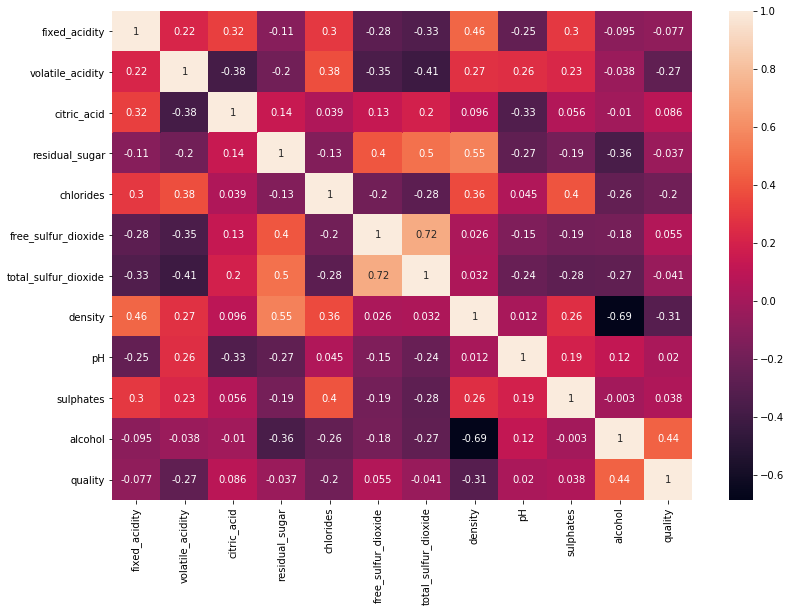

In [6]:
plt.pyplot.subplots(figsize=(13, 9))
sns.heatmap(wine.corr(), annot=True)

###  Visualization of data

In [7]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [8]:
[(i, category.count(i)) for i in set(category)]

[('Low', 246), ('Medium', 4974), ('High', 1277)]

### representation of barplot

In [9]:
sns.countplot(category, palette="muted")

In [10]:
wine["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [11]:
# perfroming label encoding for the color column to put it as 1's or 0's
# 1 is for white and 0 is for red
from sklearn.preprocessing import LabelEncoder
wine['color']=LabelEncoder().fit_transform(wine.color)
wine.head(200)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.700         0.00             1.9      0.076   
..             ...               ...          ...             ...        ...   
195            7.8             0.590         0.33             2.0      0.074   
196            7.3             0.580         0.30             2.4      0.074   
197           11.5             0.300         0.60             2.0      0.067   
198            5.4             0.835         0.08             1.2      0.046   
199            6.9             1.090         0.06             2.1      0.061   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11.0                  34.0   0.9978  3.51       0.56   
1                   25.0                  67.0   0.9968  3.20       0.68   
2                   15.0                  54.0   0.9970  3.26       0.65   
3                   17.0                  60.0   0.9980  3.16       0.58   
4                   11.0                  34.0   0.9978  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
195                 24.0                 120.0   0.9968  3.25       0.54   
196                 15.0                  55.0   0.9968  3.46       0.59   
197                 12.0                  27.0   0.9981  3.11       0.97   
198                 13.0                  93.0   0.9924  3.57       0.85   
199                 12.0                  31.0   0.9948  3.51       0.43   

     alcohol  quality  color  
0        9.4        5      0  
1        9.8        5      0  
2        9.8        5      0  
3        9.8        6      0  
4        9.4        5      0  
..       ...      ...    ...  
195      9.4        5      0  
196     10.2        5      0  
197     10.1        6      0  
198     13.0        7      0  
199     11.4        4      0  

[200 rows x 13 columns]

In [12]:
wine["color"].value_counts()

1    4898
0    1599
Name: color, dtype: int64

### Preparing Data for Modelling

In [13]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
# dividing the dataset into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2018)

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
clf = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=2018,
                                 

In [17]:
rfc_gs.best_score_

0.847798178722144

#### by performing random forest we got 84%

### Doing random forest after changing minimum samples value

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
clf = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 3, 5]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=2018,
                                 

In [19]:
rfc_gs.best_score_

0.847798178722144

####  Its still giving same value

### Decision Tree

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('scl', StandardScaler()),('pca', PCA(random_state=42)),('clf', DecisionTreeClassifier(random_state=42))])
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]
param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [21]:
print(gs_dt.best_score_)

0.7808332716369291


#### by performing decision tree classifier we got 78%

#### Therefore, random Forest gives best result. 

### checking its performance on test

In [22]:
# check its performance on test
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pred_rfc = rfc_gs.predict(X_test)
print(classification_report(y_test, pred_rfc))
print("The RF model accuracy on Test data is %s" %accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66       258
           1       1.00      0.12      0.22        56
           2       0.86      0.96      0.90       986

    accuracy                           0.85      1300
   macro avg       0.88      0.55      0.60      1300
weighted avg       0.85      0.85      0.83      1300

The RF model accuracy on Test data is 0.8461538461538461


In [23]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "good"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_confusion = pd.crosstab(y_actu, y_pred)

### Confusion matrix

In [24]:
rfc_confusion

Predicted  good  low  medium
Actual                      
good        147    0     111
low           1    7      48
medium       40    0     946

### Feature importance

In [25]:
importances = rfc_gs.best_estimator_.feature_importances_

In [26]:
feature_importances = pd.DataFrame(importances,index = wine.columns[:-1], columns=['importance']).sort_values('importance',ascending=False)

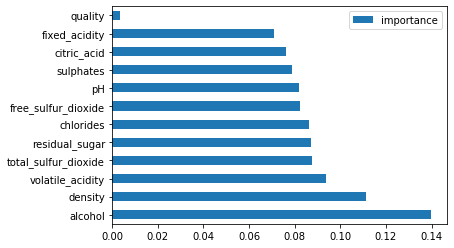

In [27]:
feature_importances.plot(kind='barh')

### By looking above barplot, we can say that good quality wines have higher levels of alcohol on average, have  lower volatile acidity on average, higher levels of sulphates, and higher levels of residual sugar on average.